In [89]:
import sys
sys.path.append('../80_Auswertungen/')
sys.path.append('../30_data_tools/')
from load_constants import load_colors
from helper import load_dotenv

import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [80]:
COLORS = load_colors()

In [90]:
dotenv = load_dotenv()

In [13]:
wavelength = 26
sin_curve = np.arange(1000)
sin_curve = np.sin(2 * np.pi * line / wavelength)

In [64]:
def get_alias_curve( sin_curve, freq, get_dots=False ):
    x_values = [x for x in range(0,sin_curve.shape[0],freq)]
    y_values = [sin_curve[x] for x in range(0,sin_curve.shape[0],freq)]

    if get_dots:
        return np.array([
            x_values,
            y_values
        ])
        
        out = []

        for x in range(sin_curve.shape[0]):
            if x in x_values:
                out.append(y_values[x_values.index(x)])
            else:
                out.append(0)
                
        return np.array(out)
    
    return np.interp([x for x in range(sin_curve.shape[0])], x_values, y_values)

In [119]:
bar_chart

Bar({
    'base': {'color': '#627a8e'},
    'name': 'wiederhergestelltes Signal',
    'x': array([  0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300., 330.,
                360., 390., 420., 450., 480., 510., 540., 570., 600., 630., 660., 690.,
                720., 750., 780., 810., 840., 870., 900., 930., 960., 990.]),
    'y': array([ 0.00000000e+00,  1.97574553e-01,  2.24039075e-01,  5.78010228e-02,
                -1.59565864e-01, -2.37604513e-01, -1.12069527e-01,  1.12069527e-01,
                 2.37604513e-01,  1.59565864e-01, -5.78010228e-02, -2.24039075e-01,
                -1.97574553e-01, -2.60495250e-15,  1.97574553e-01,  2.24039075e-01,
                 5.78010228e-02, -1.59565864e-01, -2.37604513e-01, -1.12069527e-01,
                 1.12069527e-01,  2.37604513e-01,  1.59565864e-01, -5.78010228e-02,
                -2.24039075e-01, -1.97574553e-01, -5.20990501e-15,  1.97574553e-01,
                 2.24039075e-01,  5.78010228e-02, -1.59565864e-01, -2.376045

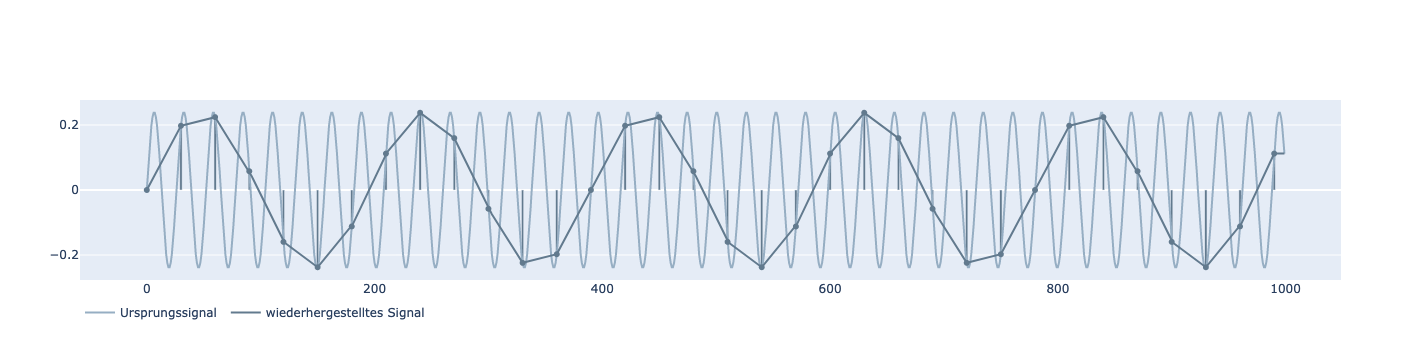

In [140]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    y=sin_curve,
    line=dict(color=COLORS['COLOR_SEQUENCE'][1]),
    mode="lines",
    name="Ursprungssignal"
))
fig.add_trace(go.Scatter(
    y=get_alias_curve( sin_curve, 30 ),
    line=dict(color=COLORS['COLOR_SEQUENCE'][0]),
    mode="lines",
    name="wiederhergestelltes Signal"
))
bar_chart = px.bar(
    x=alias_data[0,:],
    y=alias_data[1,:],
    color_discrete_sequence=[COLORS['COLOR_SEQUENCE'][0]]   
)
bar_chart.update_traces(width=2)
fig.add_trace(bar_chart.data[0])

fig.add_trace(
    px.scatter(
        x=alias_data[0,:],
        y=alias_data[1,:],
        color_discrete_sequence=[COLORS['COLOR_SEQUENCE'][0]]   
    ).data[0]
)
fig.update_layout(legend={'orientation':'h'})

fig.write_image( dotenv['ATTACHMENT_DIR'] / 'moire_mathematic' / 'alias_effect.jpg' )
fig